In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# [HEALTHCARE PROVIDER FRAUD DETECTION ANALYSIS](https://www.kaggle.com/rohitrox/healthcare-provider-fraud-detection-analysis)

![MediCare](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT7EqGpB-UkZNUi3pcVWVX1nsaXAHzZpM5z7E37Ps71VHD9nFYK)

In [2]:
### import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

from sklearn.model_selection import train_test_split, ShuffleSplit, learning_curve, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, classification_report, roc_auc_score, make_scorer, precision_recall_curve, average_precision_score 
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier, IsolationForest, VotingClassifier
from sklearn.neural_network import MLPClassifier

%matplotlib inline
plt.style.use('ggplot')

In [3]:
def read_data(tp = "Train", N = 1542865627584):
    target = pd.read_csv("Train-1542865627584.csv".format(tp.title(), N))
    pt = pd.read_csv("Train_Beneficiarydata-1542865627584.csv".format(tp.title(), N))
    in_pt = pd.read_csv("Train_Inpatientdata-1542865627584.csv".format(tp.title(), N))
    out_pt = pd.read_csv("Train_Outpatientdata-1542865627584.csv".format(tp.title(), N))
    return (in_pt, out_pt, pt, target)

## Explore datasets 

In [4]:
### Load Train data
in_pt, out_pt, asl, target = read_data()

In [5]:
asl

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138551,BENE159194,1939-07-01,NaN,1,1,0,39,140,12,12,...,2,2,2,2,2,2,0,0,430,460
138552,BENE159195,1938-12-01,NaN,2,1,0,49,530,12,12,...,2,1,2,2,2,2,0,0,880,100
138553,BENE159196,1916-06-01,NaN,2,1,0,6,150,12,12,...,1,1,1,2,2,2,2000,1068,3240,1390
138554,BENE159197,1930-01-01,NaN,1,1,0,16,560,12,12,...,2,2,1,2,2,2,0,0,2650,10


In [6]:
asl = asl.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2, 'Gender': 2 }, 0)
asl = asl.replace({'RenalDiseaseIndicator': 'Y'}, 1).astype({'RenalDiseaseIndicator': 'int64'})

In [7]:
print(asl.shape)
asl.head()

(138556, 25)


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,0,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,0,1,0,39,280,12,12,...,0,0,0,0,0,0,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,0,0,1,0,0,0,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,0,1,1,1,1,0,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,0,1,0,0,0,0,0,0,1790,1200


In [8]:
print(target.shape)
target.head()

(5410, 2)


,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


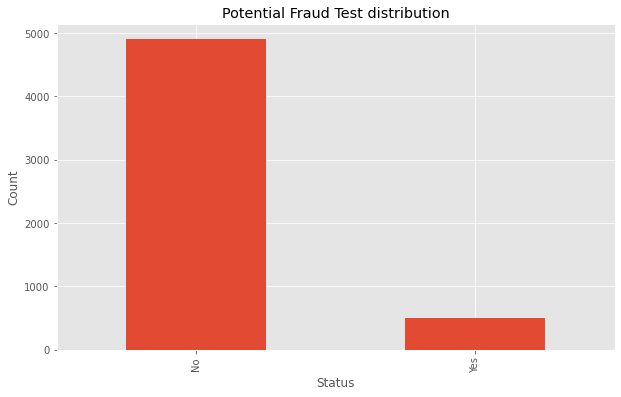

In [9]:
plt.title("Potential Fraud Test distribution")
target.groupby( ["PotentialFraud"] ).Provider.count().plot(kind = "bar", figsize = (10,6))
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

In [10]:
print(in_pt.shape)
in_pt.head()

(40474, 30)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [11]:
print(out_pt.shape)
out_pt.head()

(517737, 27)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


## Adding features and combine datasets

- 1. Add Flag column 'WhetherDead' using DOD values to tell whether beneficiary is dead on not

In [12]:
asl['WhetherDead']= 0
asl.loc[asl.DOD.notna(),'WhetherDead'] = 1

- 2. Adding Target numeric variable. 

In [13]:
target["target"] = np.where(target.PotentialFraud == "Yes", 1, 0) 

- 3. Combine Inpatient and Outpatient datasets 

In [14]:
MediCare = pd.merge(in_pt, out_pt, left_on = [ x for x in out_pt.columns if x in in_pt.columns], right_on = [ x for x in out_pt.columns if x in in_pt.columns], how = 'outer')
MediCare.shape

(558211, 30)

- 4. Add Patients information

In [15]:
data = pd.merge(MediCare, asl,left_on='BeneID',right_on='BeneID',how='inner')
data.shape

(558211, 55)

- 5. Create a new variable "NumPhysicians" with number of physians(from 0 to 3): 'AttendingPhysician' not missing + 'OperatingPhysician' not missing +  'OtherPhysician' not missing

In [16]:
### Check Physicians columns for stange records and value length.
def len_check(data , l):
    S = dict()
    for i in data.columns:
         S[i] = [x for x in data.loc[ np.any(data[[i]].notnull().to_numpy(), axis = 1)][i].unique() if (len(str(x)) < l | len(str(x)) > l ) ]
    
    print(S)

len_check(data[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']], len('PHY388358'))  

{'AttendingPhysician': [], 'OperatingPhysician': [], 'OtherPhysician': []}


In [17]:
def uniq(a):
    return np.array([len(set([i for i in x[~pd.isnull(x)]])) for x in a.values])

In [18]:
### Create new variable and drop 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician'
data['NumPhysicians'] = uniq(data[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']]) 
data = data.drop(['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician'], axis = 1)

- 6. Count number of procedures 'NumProc' for each claim.

In [19]:
ClmProcedure_vars = ['ClmProcedureCode_{}'.format(x) for x in range(1,7)]
### Create new variable 
data['NumProc'] = data[ClmProcedure_vars].notnull().to_numpy().sum(axis = 1)

In [20]:
keep = ['BeneID', 'ClaimID', 'ClmAdmitDiagnosisCode', 'NumProc' ] + ClmProcedure_vars
### Checking if procedures is unique
print(data[keep].loc[data['NumProc'] != uniq( data[ClmProcedure_vars])])

data = data.drop(ClmProcedure_vars, axis = 1)

Empty DataFrame
Columns: [BeneID, ClaimID, ClmAdmitDiagnosisCode, NumProc, ClmProcedureCode_1, ClmProcedureCode_2, ClmProcedureCode_3, ClmProcedureCode_4, ClmProcedureCode_5, ClmProcedureCode_6]
Index: []


- 7. Count number of claims, extra reported claims and unique.

In [21]:
ClmDiagnosisCode_vars =['ClmAdmitDiagnosisCode'] + ['ClmDiagnosisCode_{}'.format(x) for x in range(1, 11)]

### Create new variable 
data['NumClaims'] = data[ClmDiagnosisCode_vars].notnull().to_numpy().sum(axis = 1)

In [22]:
keep = ['BeneID', 'ClaimID', 'ClmAdmitDiagnosisCode', 'NumClaims'] + ClmDiagnosisCode_vars

### Create new variable 
data['NumClaims'] = data[ClmDiagnosisCode_vars].notnull().to_numpy().sum(axis = 1)

print(data[keep].loc[data['NumClaims'] != uniq( data[ClmDiagnosisCode_vars])].head())
### if checking result of unique claims is not missing, we are going to add number of unique claims.

       BeneID    ClaimID ClmAdmitDiagnosisCode  NumClaims  \
1   BENE11001   CLM66048                  6186          4   
35  BENE11037  CLM283913                 42731          2   
38  BENE11041   CLM54944                 49121          7   
39  BENE11041   CLM78682                 51881         10   
70  BENE11066   CLM75192                 59971         10   

   ClmAdmitDiagnosisCode ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
1                   6186               6186               2948   
35                 42731              42731                NaN   
38                 49121              49121               2752   
39                 51881              51881               2859   
70                 59971               5990              78829   

   ClmDiagnosisCode_3 ClmDiagnosisCode_4 ClmDiagnosisCode_5  \
1               56400                NaN                NaN   
35                NaN                NaN                NaN   
38               7812              71690       

In [23]:
data['NumUniqueClaims'] = uniq(data[ClmDiagnosisCode_vars])

data['ExtraClm'] = data['NumClaims'] - data['NumUniqueClaims']

data = data.drop(ClmDiagnosisCode_vars, axis = 1)
data = data.drop(['NumClaims'], axis = 1)

- 8. Convert Dates and calculate days for Claim and for Admission. Calculate patient age at time of claim. 

In [24]:
### 
data['AdmissionDt'] = pd.to_datetime(data['AdmissionDt'] , format = '%Y-%m-%d')
data['DischargeDt'] = pd.to_datetime(data['DischargeDt'],format = '%Y-%m-%d')

data['ClaimStartDt'] = pd.to_datetime(data['ClaimStartDt'] , format = '%Y-%m-%d')
data['ClaimEndDt'] = pd.to_datetime(data['ClaimEndDt'],format = '%Y-%m-%d')

data['DOB'] = pd.to_datetime(data['DOB'] , format = '%Y-%m-%d')
data['DOD'] = pd.to_datetime(data['DOD'],format = '%Y-%m-%d')

### Number of hospitalization days
data['AdmissionDays'] = ((data['DischargeDt'] - data['AdmissionDt']).dt.days) + 1
### Number of claim days 
data['ClaimDays'] = ((data['ClaimEndDt'] - data['ClaimStartDt']).dt.days) + 1

data['Age'] = round(((data['ClaimStartDt'] - data['DOB']).dt.days + 1)/365.25)

- 9. Hospitalization flag 'Hospt'

In [25]:
data['Hospt'] = np.where(data.DiagnosisGroupCode.notnull(), 1, 0)
data = data.drop(['DiagnosisGroupCode'], axis = 1)

In [26]:
### Check if there were any actions after death. 
data['DeadActions'] = np.where(np.any(np.array([ data[x] > data['DOD'] for x in ['AdmissionDt', 'DischargeDt', 'ClaimStartDt', 'ClaimEndDt']]), axis = 0), 1, 0)

print(data.loc[data['DeadActions'] > 0])

### If there is no actions after death date, we will drop this variable. 
data = data.drop(['AdmissionDt', 'DeadActions', 'DischargeDt', 'ClaimStartDt', 'ClaimEndDt', 'DOD', 'DOB'], axis = 1)

Empty DataFrame
Columns: [BeneID, ClaimID, ClaimStartDt, ClaimEndDt, Provider, InscClaimAmtReimbursed, AdmissionDt, DeductibleAmtPaid, DischargeDt, DOB, DOD, Gender, Race, RenalDiseaseIndicator, State, County, NoOfMonths_PartACov, NoOfMonths_PartBCov, ChronicCond_Alzheimer, ChronicCond_Heartfailure, ChronicCond_KidneyDisease, ChronicCond_Cancer, ChronicCond_ObstrPulmonary, ChronicCond_Depression, ChronicCond_Diabetes, ChronicCond_IschemicHeart, ChronicCond_Osteoporasis, ChronicCond_rheumatoidarthritis, ChronicCond_stroke, IPAnnualReimbursementAmt, IPAnnualDeductibleAmt, OPAnnualReimbursementAmt, OPAnnualDeductibleAmt, WhetherDead, NumPhysicians, NumProc, NumUniqueClaims, ExtraClm, AdmissionDays, ClaimDays, Age, Hospt, DeadActions]
Index: []

[0 rows x 43 columns]


## Descriptive stats

In [27]:
data.describe(exclude = ['object'])

,InscClaimAmtReimbursed,DeductibleAmtPaid,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,...,OPAnnualDeductibleAmt,WhetherDead,NumPhysicians,NumProc,NumUniqueClaims,ExtraClm,AdmissionDays,ClaimDays,Age,Hospt
count,558211.000000,557312.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.00000,558211.000000,...,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,40474.000000,558211.000000,558211.000000,558211.000000
mean,997.012133,78.421085,0.421162,1.255011,0.196786,25.446969,378.588195,11.931472,11.93877,0.401868,...,649.698745,0.007400,1.292981,0.053557,3.239150,0.033117,6.665168,2.727940,73.301277,0.072507
std,3821.534891,274.016812,0.493746,0.717437,0.397569,15.192784,265.215531,0.889712,0.78590,0.490276,...,1002.020811,0.085707,0.505266,0.280534,2.570114,0.178991,5.638538,4.904984,13.021602,0.259325
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,25.000000,0.000000
25%,40.000000,0.000000,0.000000,1.000000,0.000000,11.000000,150.000000,12.000000,12.00000,0.000000,...,120.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,1.000000,68.000000,0.000000
50%,80.000000,0.000000,0.000000,1.000000,0.000000,24.000000,350.000000,12.000000,12.00000,0.000000,...,340.000000,0.000000,1.000000,0.000000,2.000000,0.000000,5.000000,1.000000,74.000000,0.000000
75%,300.000000,0.000000,1.000000,1.000000,0.000000,38.000000,570.000000,12.000000,12.00000,1.000000,...,790.000000,0.000000,2.000000,0.000000,4.000000,0.000000,8.000000,1.000000,82.000000,0.000000
max,125000.000000,1068.000000,1.000000,5.000000,1.000000,54.000000,999.000000,12.000000,12.00000,1.000000,...,13840.000000,1.000000,3.000000,5.000000,11.000000,2.000000,36.000000,37.000000,101.000000,1.000000


In [28]:
data.shape

(558211, 36)

## Checking and impute missing records

In [29]:
data.isnull().sum()

BeneID                                  0
ClaimID                                 0
Provider                                0
InscClaimAmtReimbursed                  0
DeductibleAmtPaid                     899
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt          

In [30]:
## Fill missing results using 0
data = data.fillna(0).copy()
data.columns

Index(['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed',
       'DeductibleAmtPaid', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State',
       'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'WhetherDead', 'NumPhysicians', 'NumProc',
       'NumUniqueClaims', 'ExtraClm', 'AdmissionDays', 'ClaimDays', 'Age',
       'Hospt'],
      dtype='object')

## Group by provider each column

In [31]:
### Sum all results
df1 = data.groupby(['Provider'], as_index = False)[['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'RenalDiseaseIndicator', 
                                                  'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
                                                  'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', 
                                                  'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 
                                                  'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 
                                                  'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
                                                  'ChronicCond_stroke', 'WhetherDead', 'NumPhysicians', 
                                                  'NumProc','NumUniqueClaims', 'ExtraClm', 'AdmissionDays',
                                                  'ClaimDays', 'Hospt']].sum()
### Count number of records
df2 = data[['BeneID', 'ClaimID']].groupby(data['Provider']).nunique().reset_index()
### Calculate mean
df3 = data.groupby(['Provider'], as_index = False)[['NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
                                                    'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
                                                    'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age']].mean()
### Combine all together
df = df2.merge(df1, on='Provider', how='left').merge(df3, on='Provider', how='left')
print(df.shape, target.shape)

(5410, 32) (5410, 3)


# Machine Learning for fraud detection 

In [32]:
df1 = df.merge(target, on='Provider', how='left').drop(['Provider', 'target'], axis = 1)
df2 = df.merge(target, on='Provider', how='left').drop(['Provider', 'PotentialFraud'], axis = 1)
print(df.shape, target.shape)

(5410, 32) (5410, 3)


C:\Users\shale\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\shale\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


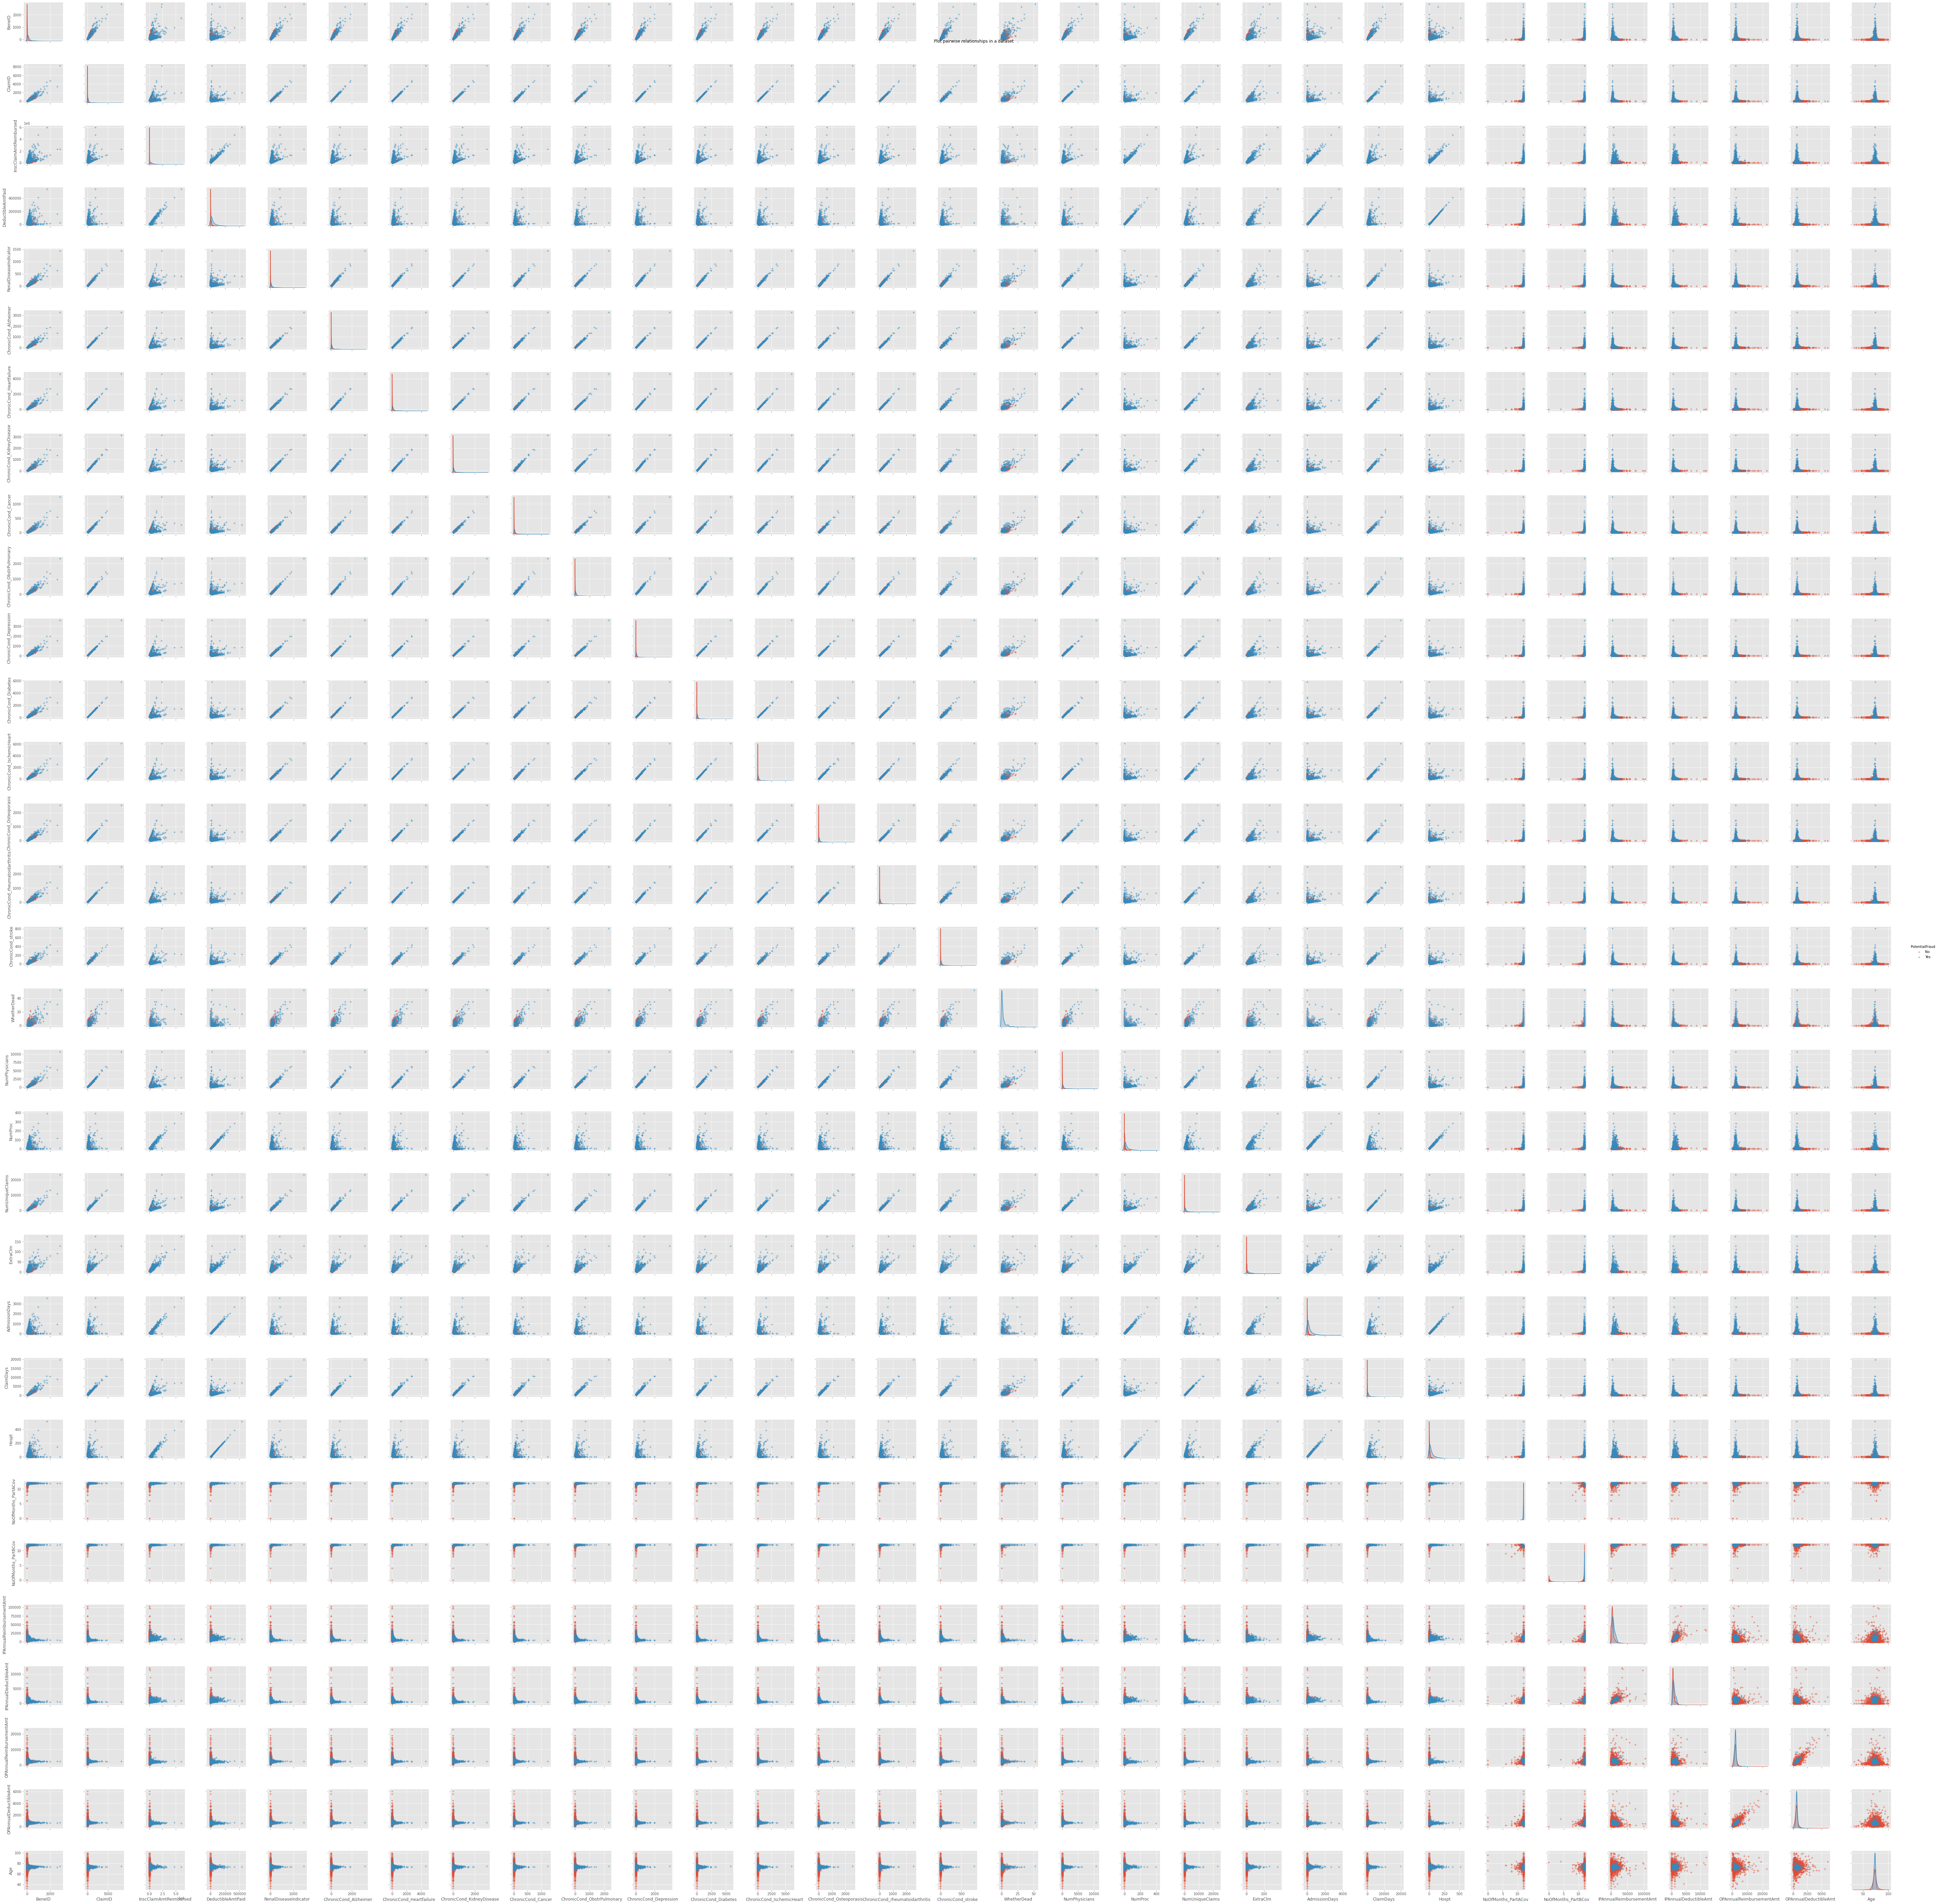

In [33]:
g = sns.pairplot(df1, hue = 'PotentialFraud', markers="+")
g.fig.suptitle('Plot pairwise relationships in a dataset')
plt.show()

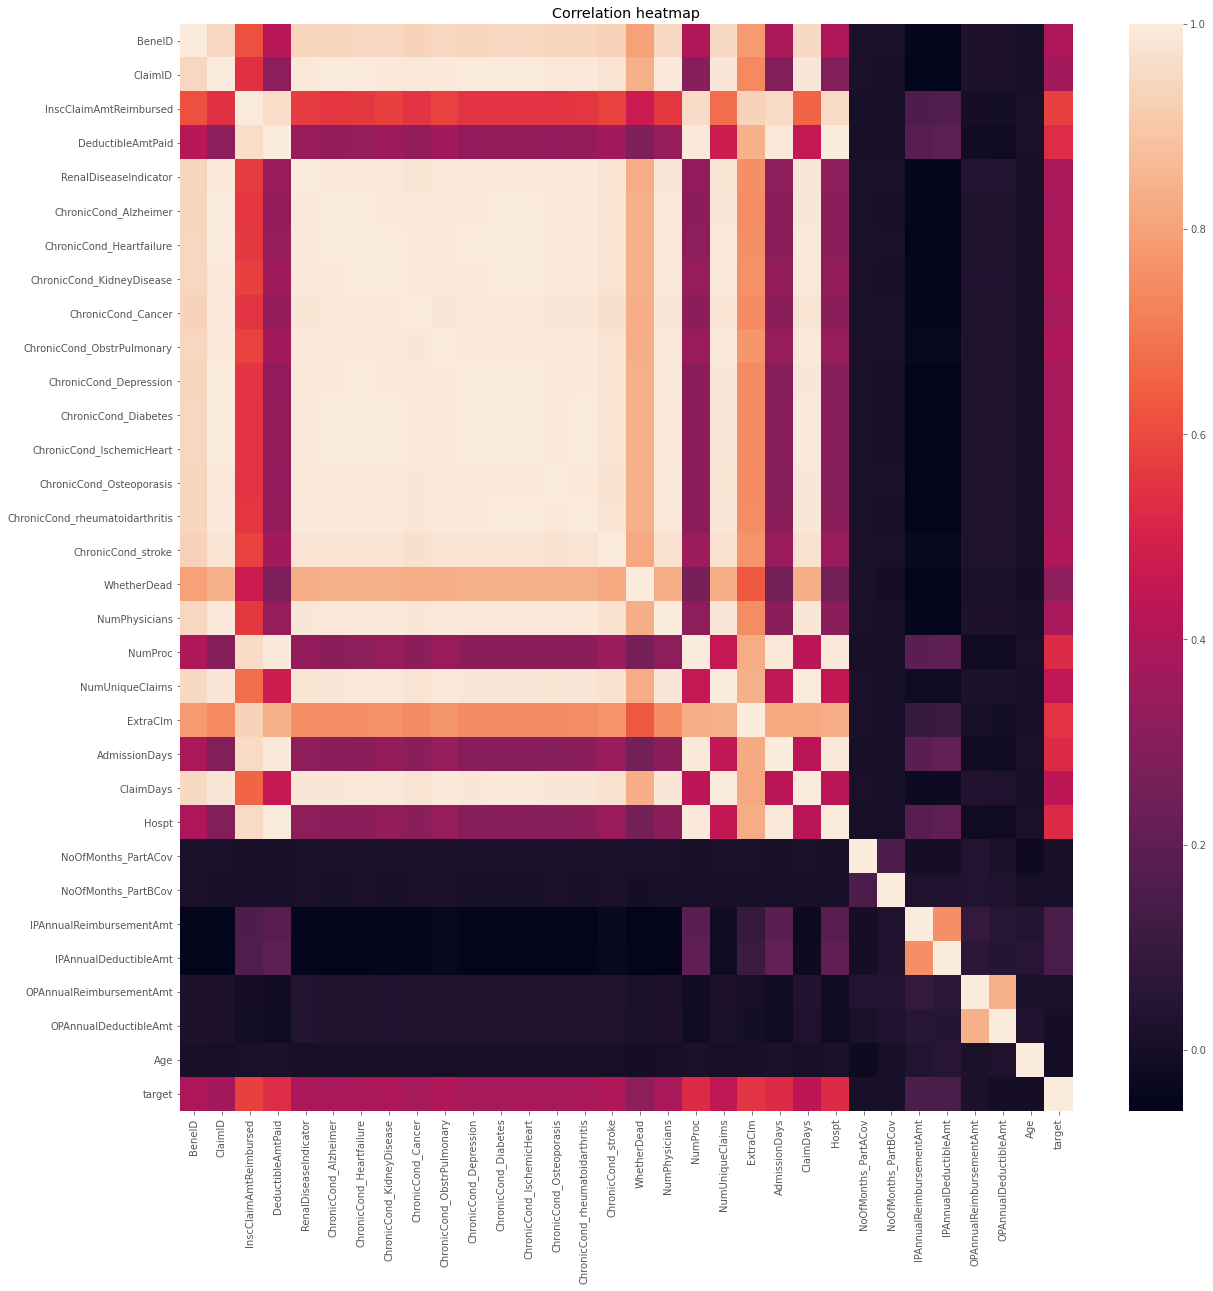

In [34]:
plt.figure(figsize=(20, 20))
plt.title('Correlation heatmap')
sns.heatmap(df2.corr())
plt.show()

In [35]:
countFraud = target.target.value_counts()
print('No:', countFraud[0])
print('Yes:', countFraud[1])
print('Proportion:', round(countFraud[1] / countFraud[0], 2))
### We should keep in mind that we are using unbalanced data

No: 4904
Yes: 506
Proportion: 0.1


## Splitting the data

In [36]:
### Only Train dataset is labeled that why we split it to two sets train and validation
X_train, X_val, y_train, y_val = train_test_split(df.drop(['Provider'], axis = 1), target.target.to_numpy(), test_size=0.25, random_state=1)

cols = X_train.columns

X_train = StandardScaler().fit_transform(X_train)
X_val = StandardScaler().fit_transform(X_val)

print("Train obs: {}; Features Number: {}".format(X_train.shape[0], X_train.shape[1]))
print("Validation obs: {};".format(X_val.shape[0]))

Train obs: 4057; Features Number: 31
Validation obs: 1353;


In [37]:
## write Master Learn class which we are going to use for our analysis
class MasterL:
    
    def __init__(self, model, #### model is a method which we are going to use for detecting FRAUDS. For example: sklearn.svm
                 X= X_train, y= y_train, test= X_val, ### data
                 **kvars  #### additional key parameters for model
                ):
        self.clf = model( **kvars)
        self.methodname = model.__name__
        self.X_train = X
        self.y_train = y
        self.X_test = test
        self.fit(self.X_train, self.y_train)
        self.predicted = self.predict(test)
        
    def fit (self, X, y):
        self.clf.fit(X, y)
    
    def predict(self, x):
        return self.clf.predict(x)
       
    def get_score(self, y = y_val, roc = True, params = False):
        accuracy = accuracy_score(self.predicted, y)
        if params:
            print(self.clf.get_params())
        print(self.methodname+ " metrics:\n")
        print(" Accuracy Score: %.2f%%" % (accuracy * 100.0))
        print(" Confusion matrix:", "\n",confusion_matrix(y_true=y, y_pred=self.predicted))
        print( 'Classification report:\n', classification_report(y, self.predicted))
        if roc:
            print(" ROC Score: %.2f%%" % (roc_auc_score(y, self.clf.predict_proba(self.X_test)[:,1])))
        
    def plot_curves(self, y = y_val):   
        plt.figure(figsize=(17, 5))
        plt.subplot(131)
        # Plot the recall precision tradeoff        
        self.plot_pr_curve(y)
        plt.subplot(132)        
        self.plot_lern_curve(accuracy_score)     
        plt.subplot(133)
        self.plot_lern_curve(roc_auc_score)
        plt.show()
        
    def plot_pr_curve(self, y = y_val):
        
        plt.subplot(122)
        # Calculate average precision and the PR curve
        average_precision = average_precision_score(y, self.predicted)

        # Obtain precision and recall 
        precision, recall, _ = precision_recall_curve(y, self.clf.predict_proba(self.X_test)[:,1])
        
        plt.step(recall, precision, where='post')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.ylim([0.0, 1.05])
        plt.xlim([0.0, 1.05])
        plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format( average_precision))
    
    def plot_lern_curve(self, metrics):
        plt.title(self.methodname + " Learning Curves")
        plt.xlabel("Training examples")
        plt.ylabel("{}".format(' '.join(metrics.__name__.split('_')).title()))
        
        train_sizes, train_scores, test_scores = learning_curve(self.clf, self.X_train, self.y_train, n_jobs=-1, 
                                                                cv = ShuffleSplit(n_splits=5, test_size=.25 , random_state = 5), 
                                                                train_sizes=np.linspace(0.5, 1.0, 10), scoring = make_scorer(metrics))
        train_scores_mean = np.mean(train_scores, axis=1) 
        test_scores_mean = np.mean(test_scores, axis=1) 
        #plt.grid()

        plt.plot(train_sizes,  train_scores_mean, 'o-', color="r", label="Training score")
        plt.plot(train_sizes,  test_scores_mean, 'o-', color="g", label="Cross-validation score")
        
        plt.legend(loc="best")
    
    def plot_roc_curve(self, y = y_val, models = None, fig = None):
        fig = plt.figure(figsize=(15, 7))
        ax = fig.add_subplot(121)
        
        self.roc_curves(ax, y, models)
        
        ax.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
        
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        
        plt.legend(loc="best")
        
        #if fig != None:
            #plt.savefig( fig, bbox_inches = 'tight')
       
    def roc_curves(self, p, y, M):
        if M == None:
            fpr, tpr, thresholds = roc_curve(y, self.clf.predict_proba(self.X_test)[:,1] )
            p.plot(fpr, tpr,  label=self.methodname )
        else:
            fpr, tpr, thresholds = roc_curve(y, self.clf.predict_proba(self.X_test)[:,1] )
            p.plot(fpr, tpr,  label=self.methodname )
            for i in M:
                fpr, tpr, thresholds = roc_curve(y, i.clf.predict_proba(i.X_test)[:,1] )
                p.plot(fpr, tpr,  label=i.methodname )

#### Function for serching best parameters which is fiting the model and shows best results for specified method.               
def grid(method, parameters):
    
    grid_1 = GridSearchCV(method, parameters, scoring = make_scorer(accuracy_score), cv=5, n_jobs = -1)
    grid_2 = GridSearchCV(method, parameters, scoring = make_scorer(roc_auc_score), cv=5, n_jobs = -1)
    
    grid_1.fit(X_train, y_train)
    print('Best parameters using accuracy score:')
    print(grid_1.best_params_)

    grid_2.fit(X_train, y_train)
    print('Best parameters usin ROC accuracy score:')
    print(grid_2.best_params_)

## 1. Logistic regression

### Grid Seach best Parametes for Log-reg L2 regularization
```pyhon
parameters = { 
        'C' : np.linspace(0.001, 1.0, 1000)
}

grid(LogisticRegression(solver= 'liblinear', class_weight='balanced', random_state = 5), parameters)
```

### Grid Seach best Parametes for Log-reg L1 regularization
```
parameters = { 
        'C' : np.linspace(0.001, 1.0, 1000)
}

grid(LogisticRegression(penalty = 'l1', solver= 'liblinear', class_weight='balanced', random_state = 5), parameters)
```

In [38]:
### Logistic regression 
### Balanced Weight and Scaled data
ML1 = MasterL(LogisticRegression, 
              penalty= 'l1',
              solver= 'liblinear', class_weight='balanced', random_state = 5 , C = 0.001)
# Get your performance metrics
ML1.get_score()

LogisticRegression metrics:

 Accuracy Score: 83.74%
 Confusion matrix: 
 [[1023  210]
 [  10  110]]
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.83      0.90      1233
           1       0.34      0.92      0.50       120

    accuracy                           0.84      1353
   macro avg       0.67      0.87      0.70      1353
weighted avg       0.93      0.84      0.87      1353

 ROC Score: 0.94%


### Plot validation results

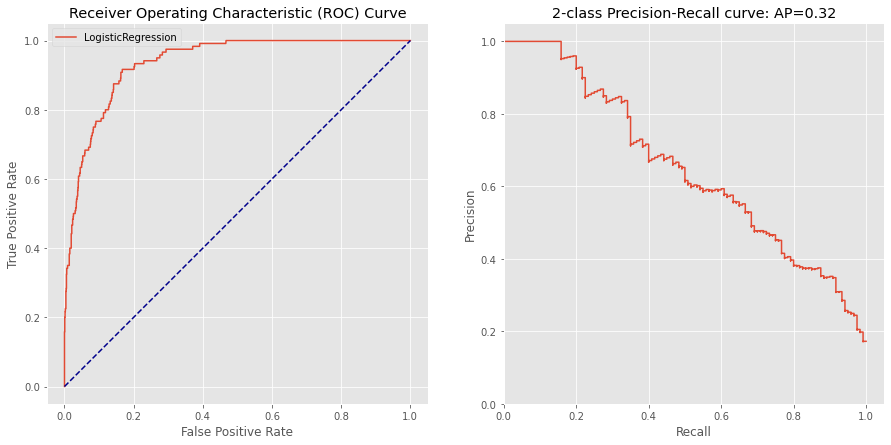

In [39]:
ML1.plot_roc_curve()
ML1.plot_pr_curve()

## 2. Support Vector Machines(SVM)

### Grid Seach best Parametes for SVM
```
parameters = { 
        #'gamma' : np.linspace(0.01, .1, 5),
        'C' : np.linspace(0.1, 1.0, 10)
}

grid(SVC( gamma = 'auto', probability = True, random_state= 5, class_weight= 'balanced'), parameters)
```

In [40]:
# SVM(scaled data)
ML2 = MasterL(SVC, 
              gamma = 'auto', probability = True, random_state= 5, class_weight= 'balanced', C=1 )

# Get your performance metrics
ML2.get_score()

SVC metrics:

 Accuracy Score: 85.07%
 Confusion matrix: 
 [[1046  187]
 [  15  105]]
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.85      0.91      1233
           1       0.36      0.88      0.51       120

    accuracy                           0.85      1353
   macro avg       0.67      0.86      0.71      1353
weighted avg       0.93      0.85      0.88      1353

 ROC Score: 0.92%


### Plot validation results

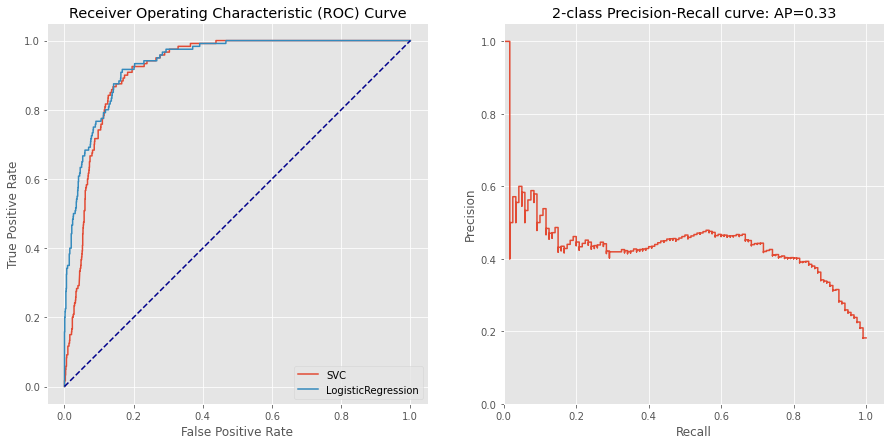

In [41]:
ML2.plot_roc_curve(models = [ML1])
ML2.plot_pr_curve()

## 3. Random Forest Clasifier

### Search best parametes**
```
kf = KFold(n_splits=5)
est = np.linspace(10, 200, 39)

RandFo = dict() 
def kind_GridSearchCV(i):
    acScore = list()
    rocScore = list()    
    for train_index, test_index in kf.split(X_train):
        Xtrain, Xtest = X_train[train_index], X_train[test_index]
        ytrain, ytest = y_train[train_index], y_train[test_index]
        RandFo[i] = RandomForestClassifier(n_estimators =  i, n_jobs = -1, random_state = 5, 
                                           class_weight = 'balanced_subsample', min_samples_split = 0.25 )
        RandFo[i].fit(Xtrain, ytrain)
        acScore.append(accuracy_score(RandFo[i].predict(X_val), y_val))
        rocScore.append(roc_auc_score(y_val, RandFo[i].predict_proba(X_val)[:,1]))
        
    return  [ i, np.mean(acScore), np.mean(rocScore) ]

scores = list()
for i in est:
    scores.append(kind_GridSearchCV(int(i)))

scoresD = pd.DataFrame(scores, columns = ['N_est', 'Accuracy', "ROC accuracy"])

print(scoresD.sort_values(by=['Accuracy'], ascending=False).iloc[0])
print(scoresD.sort_values(by=["ROC accuracy"], ascending=False).iloc[0])
```

In [42]:
### Random Forest Clasifier
# Continue fitting the model and obtain predictions

ML3 = MasterL(RandomForestClassifier, 
              n_estimators = 60, n_jobs = -1, random_state = 5, class_weight = 'balanced_subsample', 
              min_samples_split = 0.25
             )
 
# Get your performance metrics
ML3.get_score() 

RandomForestClassifier metrics:

 Accuracy Score: 78.42%
 Confusion matrix: 
 [[950 283]
 [  9 111]]
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.77      0.87      1233
           1       0.28      0.93      0.43       120

    accuracy                           0.78      1353
   macro avg       0.64      0.85      0.65      1353
weighted avg       0.93      0.78      0.83      1353

 ROC Score: 0.92%


### Plot validation results

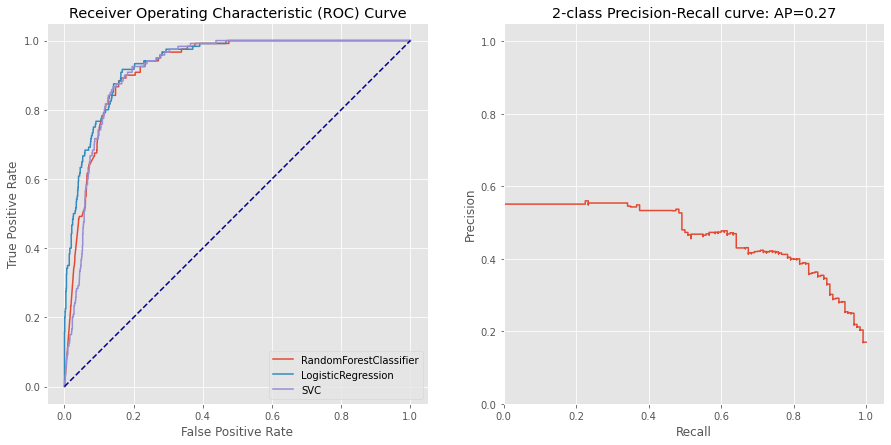

In [43]:
ML3.plot_roc_curve(models = [ML1, ML2])
ML3.plot_pr_curve()

### Top highest scoring Random Forest Features


In [44]:
features = ML3.clf.feature_importances_
Features_score = pd.DataFrame(np.array([cols, features]).T, columns = ["VarName", "Importamce"]).sort_values(by=["Importamce"], ascending=False)

Features_score.head()

,VarName,Importamce
21,AdmissionDays,0.159161
2,InscClaimAmtReimbursed,0.140527
3,DeductibleAmtPaid,0.113984
20,ExtraClm,0.105328
18,NumProc,0.0806452


## 4. Ensemble method clasifier (log-reg + Random Forest)

In [45]:
### Generate ensemble
ML4 = MasterL(VotingClassifier, 
              estimators=[ ('lr', ML1.clf), ("rf", ML3.clf)], voting='soft', n_jobs = -1
             )
 
# Get your performance metrics
ML4.get_score()

VotingClassifier metrics:

 Accuracy Score: 78.71%
 Confusion matrix: 
 [[954 279]
 [  9 111]]
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.77      0.87      1233
           1       0.28      0.93      0.44       120

    accuracy                           0.79      1353
   macro avg       0.64      0.85      0.65      1353
weighted avg       0.93      0.79      0.83      1353

 ROC Score: 0.93%


* ### Plot validation results

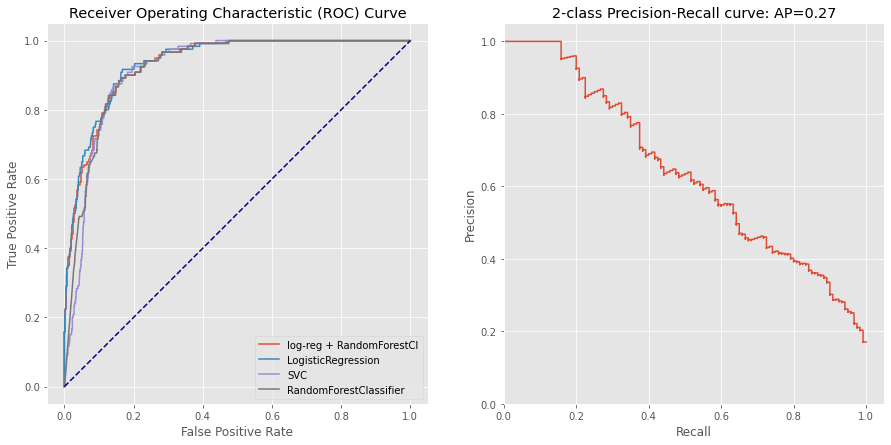

In [46]:
ML4.methodname = "log-reg + RandomForestCl"
ML4.plot_roc_curve(models = [ML1, ML2, ML3])
ML4.plot_pr_curve()

## 5. Multi-layer Perceptron classifier(MLP) The best perfroming model in terms of F1 score

### Grid Seach best Parametes for MLP
```
x = np.array(list(map(int, np.linspace(1, 31, 31))))

parameters = { 
        'hidden_layer_sizes' : list(zip(np.tile(x, len(x)), np.repeat(x, len(x))))
}

grid(MLPClassifier ( activation = 'logistic', random_state = 5, max_iter= 1000), parameters)
```

In [47]:
### Multy Layer Perceptron
ML5 = MasterL( MLPClassifier, 
              activation = 'logistic',
              hidden_layer_sizes = (1, 3),random_state = 5, max_iter= 1000 )
# Get your performance metrics 
ML5.get_score()

MLPClassifier metrics:

 Accuracy Score: 91.65%
 Confusion matrix: 
 [[1158   75]
 [  38   82]]
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95      1233
           1       0.52      0.68      0.59       120

    accuracy                           0.92      1353
   macro avg       0.75      0.81      0.77      1353
weighted avg       0.93      0.92      0.92      1353

 ROC Score: 0.94%


### Plot validation results

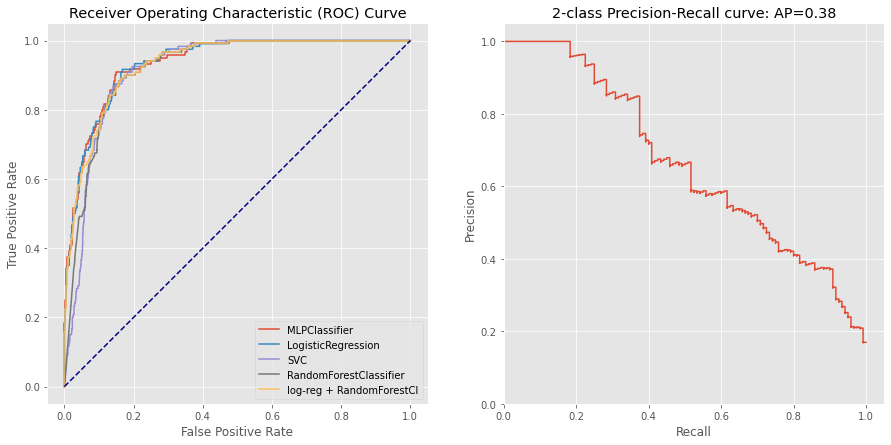

In [48]:
ML5.plot_roc_curve(models = [ML1, ML2, ML3, ML4])
ML5.plot_pr_curve()